# **Análisis Exploratorio de Datos (EDA) - Customer Personality Analysis**
# Fundamentos de Machine Learning

## Introducción

Este notebook contiene un análisis exploratorio de datos completo del dataset "Customer Personality Analysis", que proviene de una empresa de ventas que realizó campañas de marketing. El objetivo es analizar el comportamiento de diferentes perfiles de clientes y buscar patrones de consumo asociados a variables demográficas y a la respuesta a las campañas de marketing.

## Configuración inicial y carga de datos

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

### Carga del dataset

Para este análisis, utilizaremos el dataset de Customer Personality Analysis disponible en Kaggle.

In [2]:
# Cargar el dataset
# En Google Colab, podemos usar:
from google.colab import files
uploaded = files.upload() # Sube el archivo del dataset

# O si se descarga directamente de kaggle:
# !pip install kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d imakash3011/customer-personality-analysis
# !unzip customer-personality-analysis.zip

# Para este notebook, asumiremos que el archivo está disponible localmente
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


FileNotFoundError: [Errno 2] No such file or directory: 'marketing_campaign.csv'

## 1. Exploración inicial y tipos de datos

In [ ]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Descripción estadística básica
print("\nEstadísticas descriptivas básicas:")
df.describe()

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
df.isnull().sum()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### 1.1 Identificación y clasificación de variables

Es fundamental identificar correctamente los tipos de variables para aplicar los análisis estadísticos adecuados:

In [ ]:
# Clasificación de variables
print("\n--- Clasificación de variables ---")

# Variables numéricas (cuantitativas)
numericas_continuas = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
numericas_discretas = ['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
                       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
                       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                       'Complain', 'Response']

# Variables categóricas (cualitativas)
categoricas_nominales = ['Marital_Status', 'Education']
categoricas_ordinales = [] # No hay variables claramente ordinales en este dataset

print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables categóricas ordinales:", categoricas_ordinales)

# Convertir variables categóricas al tipo correcto
for col in categoricas_nominales + categoricas_ordinales:
    df[col] = df[col].astype('category')


--- Clasificación de variables ---
Variables numéricas continuas: ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Variables numéricas discretas: ['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
Variables categóricas nominales: ['Marital_Status', 'Education']
Variables categóricas ordinales: []


### 1.2 Preprocesamiento básico de datos

Antes de continuar con el análisis, realizaremos algunos pasos de preprocesamiento:

In [ ]:
# Verificar y tratar valores nulos
print("\nTotal de valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values[null_values > 0])

# Vemos que la columna Income tiene valores nulos
# Para este análisis, imputaremos con la mediana (más robusta a outliers)
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convertir Dt_Customer a datetime y extraer información útil
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Since_Days'] = (pd.Timestamp('2015-01-01') - df['Dt_Customer']).dt.days
# Asumimos '2015-01-01' como fecha de referencia según el contexto del dataset

# Calcular edad a partir del año de nacimiento
df['Age'] = 2015 - df['Year_Birth']  # Asumimos 2015 como año de referencia

# Calcular gasto total por cliente
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                  df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Calcular número total de hijos
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Calcular número total de compras
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + \
                      df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calcular número total de campañas aceptadas
df['NumAcceptedCmps'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + \
                        df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# Verificar que no queden valores nulos
print("\nVerificación final de valores nulos:")
print(df.isnull().sum().sum())


Total de valores nulos por columna:
Income    24
dtype: int64

Verificación final de valores nulos:
0


## 2. Análisis estadístico descriptivo

### 2.1 Medidas de tendencia central y dispersión para variables numéricas

In [ ]:
# Selección de variables numéricas de interés para el análisis
numerical_vars = ['Age', 'Income', 'TotalChildren', 'TotalSpent',
                  'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'Recency',
                  'NumWebVisitsMonth', 'TotalPurchases', 'NumAcceptedCmps']

# Estadísticas descriptivas completas para variables numéricas
print("\n--- Estadísticas descriptivas para variables numéricas ---")
stats_df = df[numerical_vars].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
stats_df = stats_df.T  # Transponer para mejor visualización
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variación
stats_df['skew'] = df[numerical_vars].skew()  # Asimetría
stats_df['kurt'] = df[numerical_vars].kurtosis()  # Curtosis
stats_df = stats_df.round(2)  # Redondear para mejor legibilidad
print(stats_df)

# Función para calcular la moda
def get_mode(x):
    mode_result = stats.mode(x)
    # Handle cases where mode_result.mode is a scalar
    if hasattr(mode_result, 'mode'):  # For scipy < 1.9.0
        return mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:  # For scipy >= 1.9.0
        return mode_result.mode

# Añadir moda a las estadísticas
print("\n--- Moda para variables numéricas ---")
modes = {col: get_mode(df[col].dropna()) for col in numerical_vars}
for col, mode_val in modes.items():
    print(f"{col}: {mode_val}")

# Análisis de distribución de variables clave
print("\n--- Análisis de distribución y sesgo ---")
for col in ['Age', 'Income', 'TotalSpent', 'NumAcceptedCmps']:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skew:.2f} - ", end="")
    if skew > 0.5:
        print("Sesgo positivo significativo (cola a la derecha)")
    elif skew < -0.5:
        print("Sesgo negativo significativo (cola a la izquierda)")
    else:
        print("Distribución aproximadamente simétrica")

    print(f"  Curtosis: {kurt:.2f} - ", end="")
    if kurt > 0.5:
        print("Leptocúrtica (más apuntada que la normal)")
    elif kurt < -0.5:
        print("Platicúrtica (más aplanada que la normal)")
    else:
        print("Mesocúrtica (similar a la normal)")
    print()


--- Estadísticas descriptivas para variables numéricas ---
                    count      mean       std     min       1%        5%  \
Age                2240.0     46.19     11.98    19.0    23.00     27.00   
Income             2240.0  52237.98  25037.96  1730.0  7705.92  19101.05   
TotalChildren      2240.0      0.95      0.75     0.0     0.00      0.00   
TotalSpent         2240.0    605.80    602.25     5.0    13.00     22.00   
MntWines           2240.0    303.94    336.60     0.0     1.00      3.00   
MntFruits          2240.0     26.30     39.77     0.0     0.00      0.00   
MntMeatProducts    2240.0    166.95    225.72     0.0     2.00      4.00   
MntFishProducts    2240.0     37.53     54.63     0.0     0.00      0.00   
MntSweetProducts   2240.0     27.06     41.28     0.0     0.00      0.00   
Recency            2240.0     49.11     28.96     0.0     0.00      4.00   
NumWebVisitsMonth  2240.0      5.32      2.43     0.0     1.00      1.00   
TotalPurchases     2240.0   

### 2.2 Análisis de variables categóricas

In [ ]:
# Análisis de variables categóricas
print("\n--- Análisis de variables categóricas ---")

# Frecuencias absolutas y relativas para variables categóricas
for col in categoricas_nominales:
    print(f"\nFrecuencias para {col}:")
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True).round(4) * 100
    freq_table = pd.DataFrame({
        'Frecuencia': freq_abs,
        'Porcentaje (%)': freq_rel
    })
    print(freq_table)
    print(f"Moda: {freq_abs.index[0]} (aparece {freq_abs.iloc[0]} veces)")

# Análisis de variables binarias
binary_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
               'AcceptedCmp5', 'Response', 'Complain']

print("\n--- Análisis de variables binarias (campañas y quejas) ---")
binary_summary = pd.DataFrame({
    'Total_1': [df[col].sum() for col in binary_vars],
    'Porcentaje_1 (%)': [(df[col].sum() / len(df) * 100).round(2) for col in binary_vars]
})
binary_summary.index = binary_vars
print(binary_summary)


--- Análisis de variables categóricas ---

Frecuencias para Marital_Status:
                Frecuencia  Porcentaje (%)
Marital_Status                            
Married                864           38.57
Together               580           25.89
Single                 480           21.43
Divorced               232           10.36
Widow                   77            3.44
Alone                    3            0.13
Absurd                   2            0.09
YOLO                     2            0.09
Moda: Married (aparece 864 veces)

Frecuencias para Education:
            Frecuencia  Porcentaje (%)
Education                             
Graduation        1127           50.31
PhD                486           21.70
Master             370           16.52
2n Cycle           203            9.06
Basic               54            2.41
Moda: Graduation (aparece 1127 veces)

--- Análisis de variables binarias (campañas y quejas) ---
              Total_1  Porcentaje_1 (%)
AcceptedCmp1      1

## 3. Visualizaciones para el análisis

### 3.1 Distribuciones de variables numéricas clave

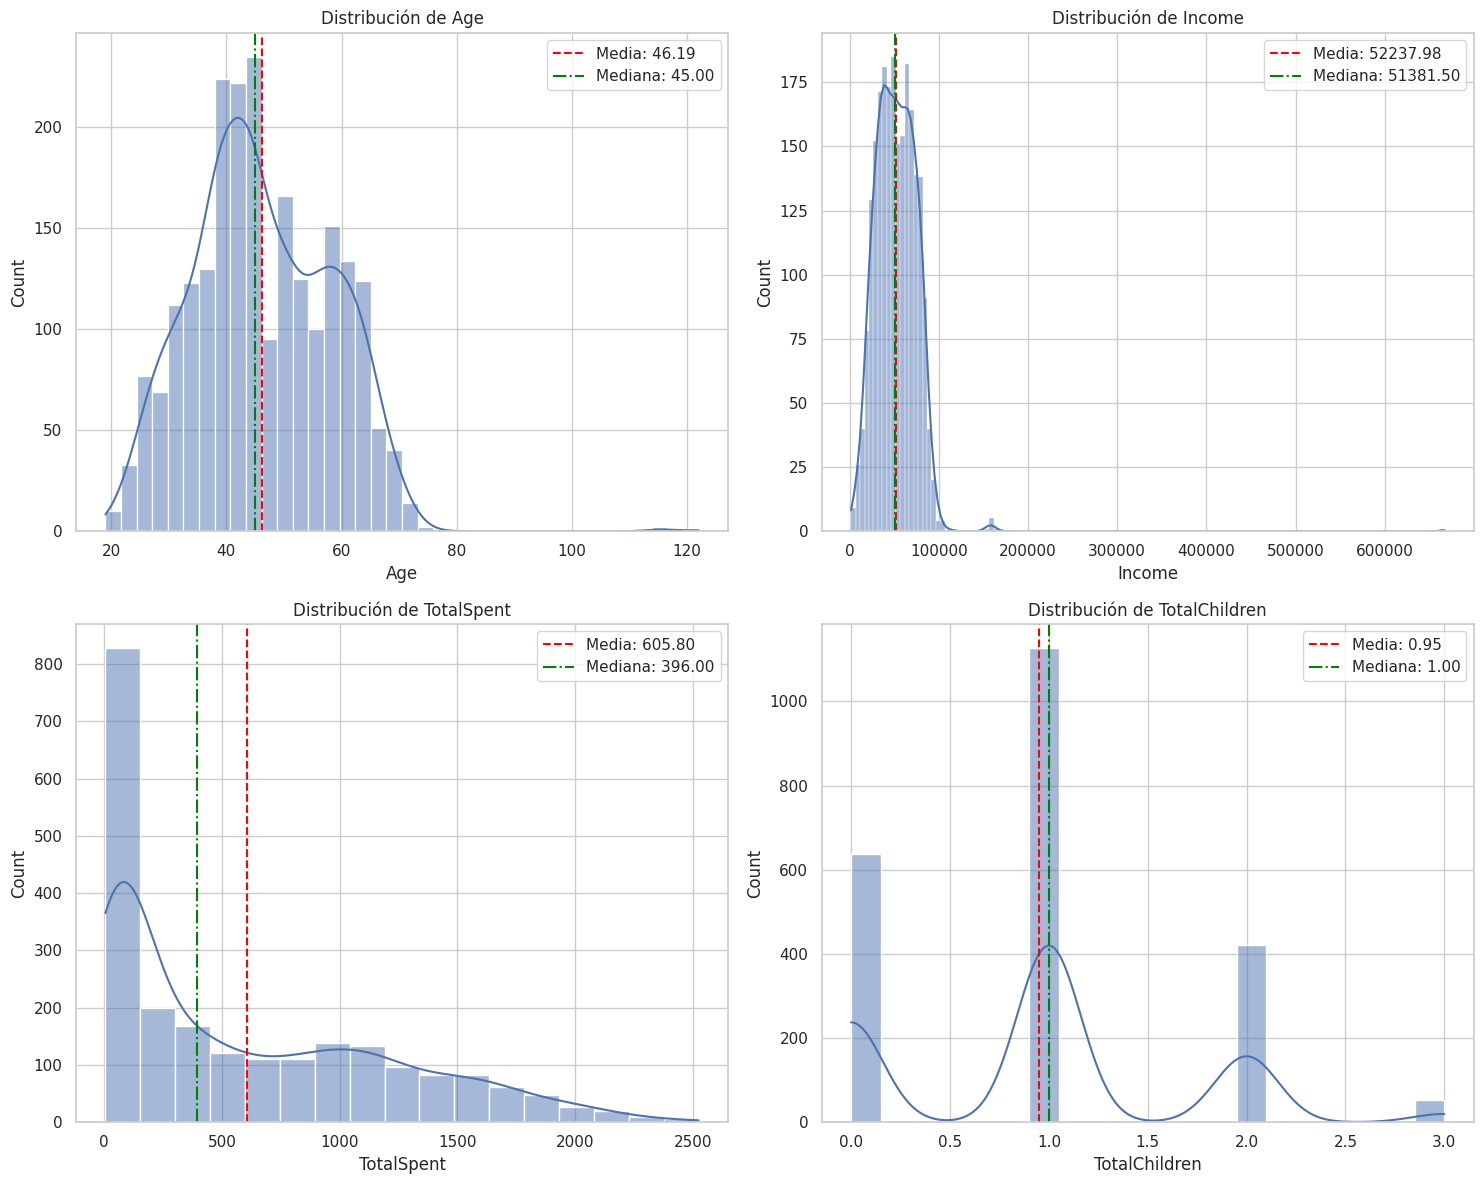

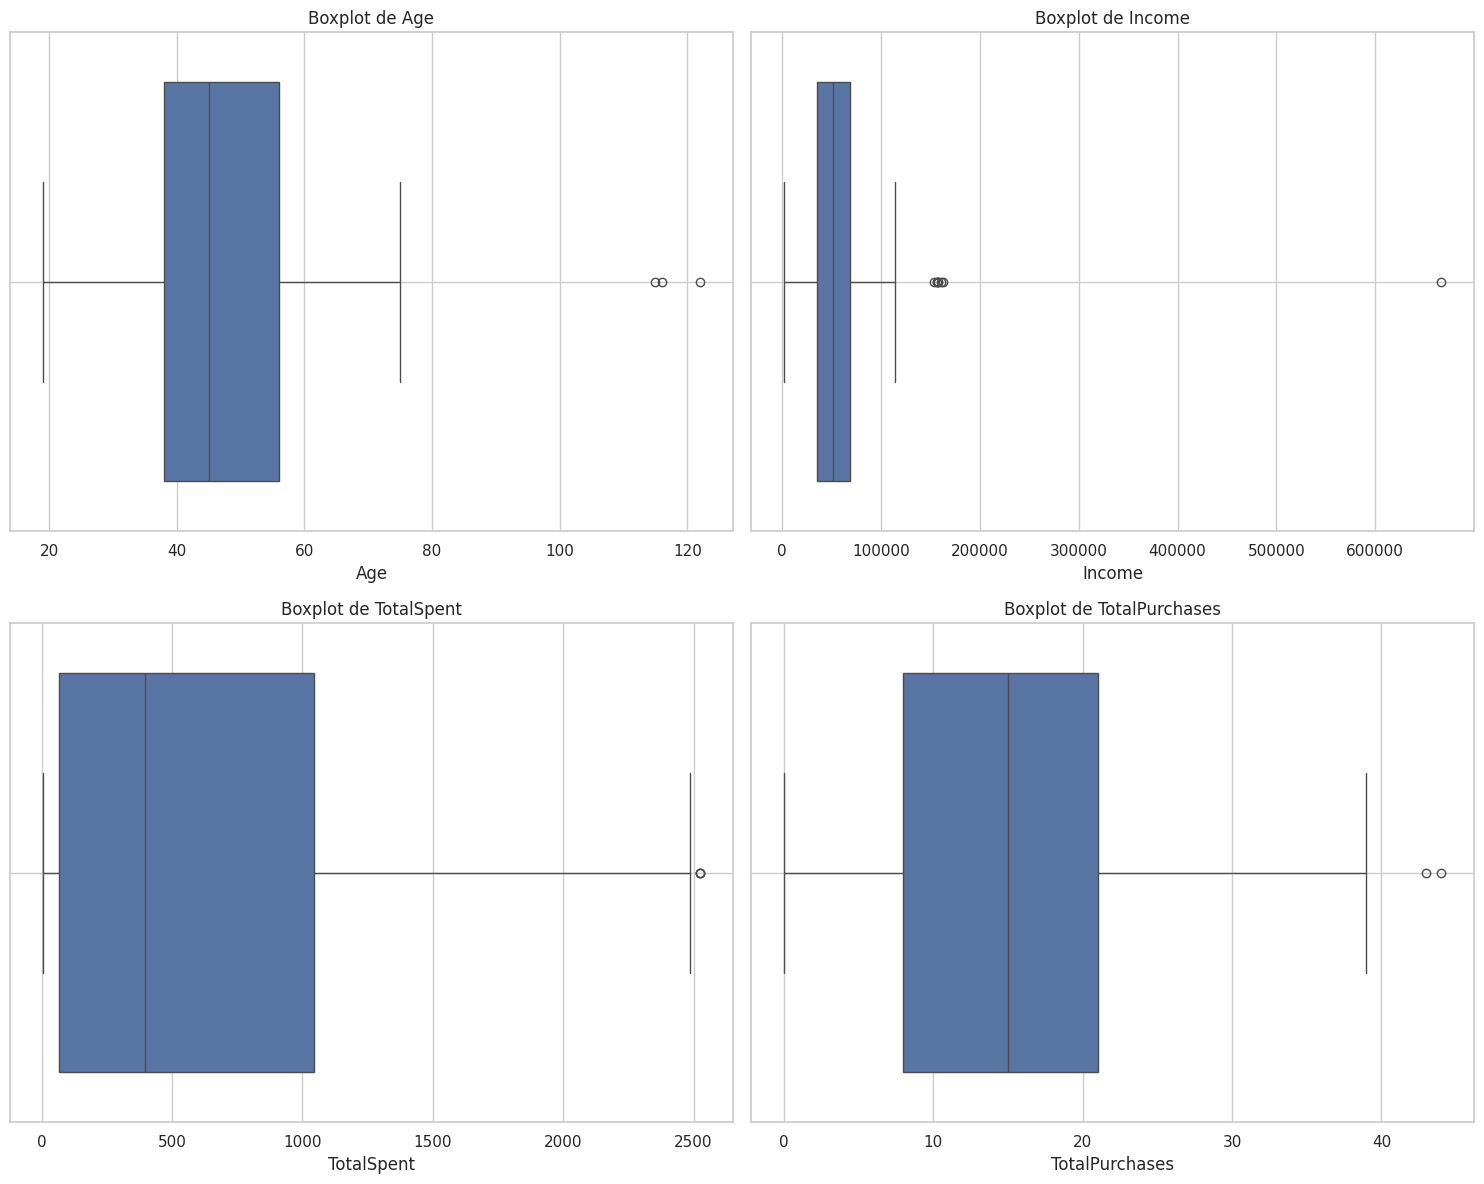

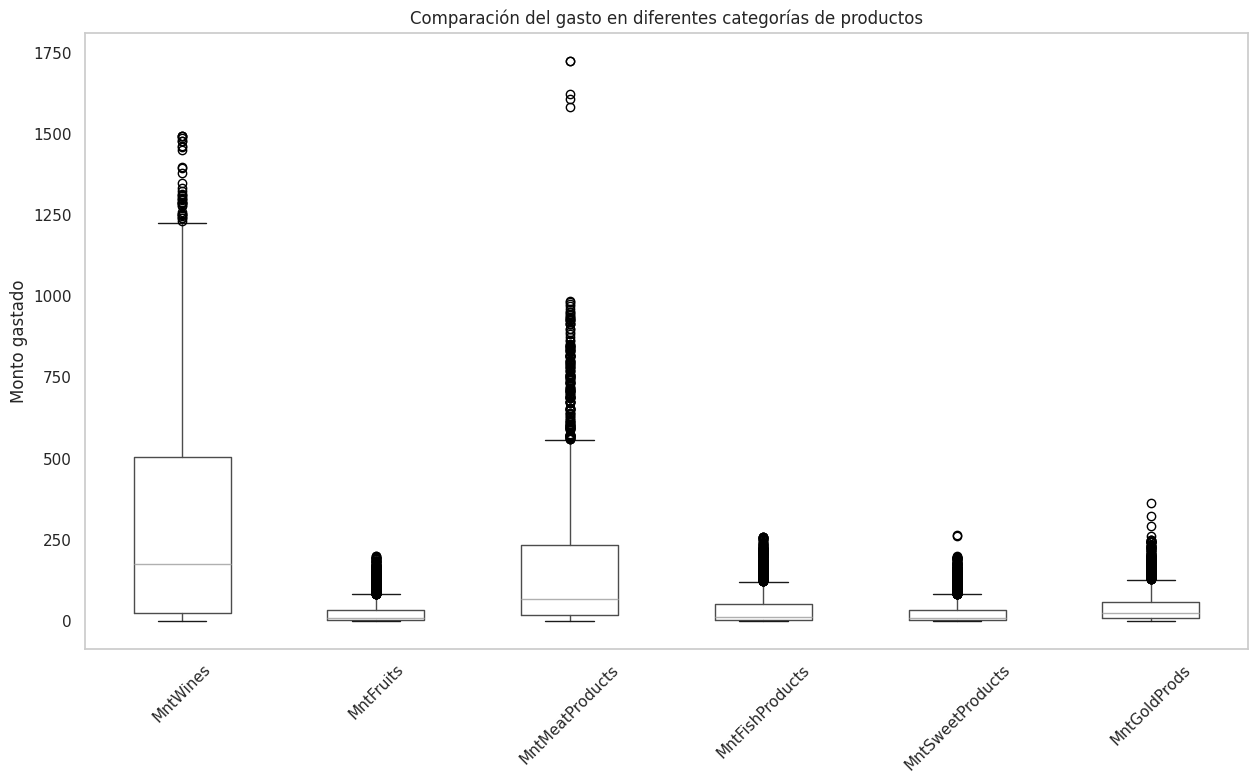

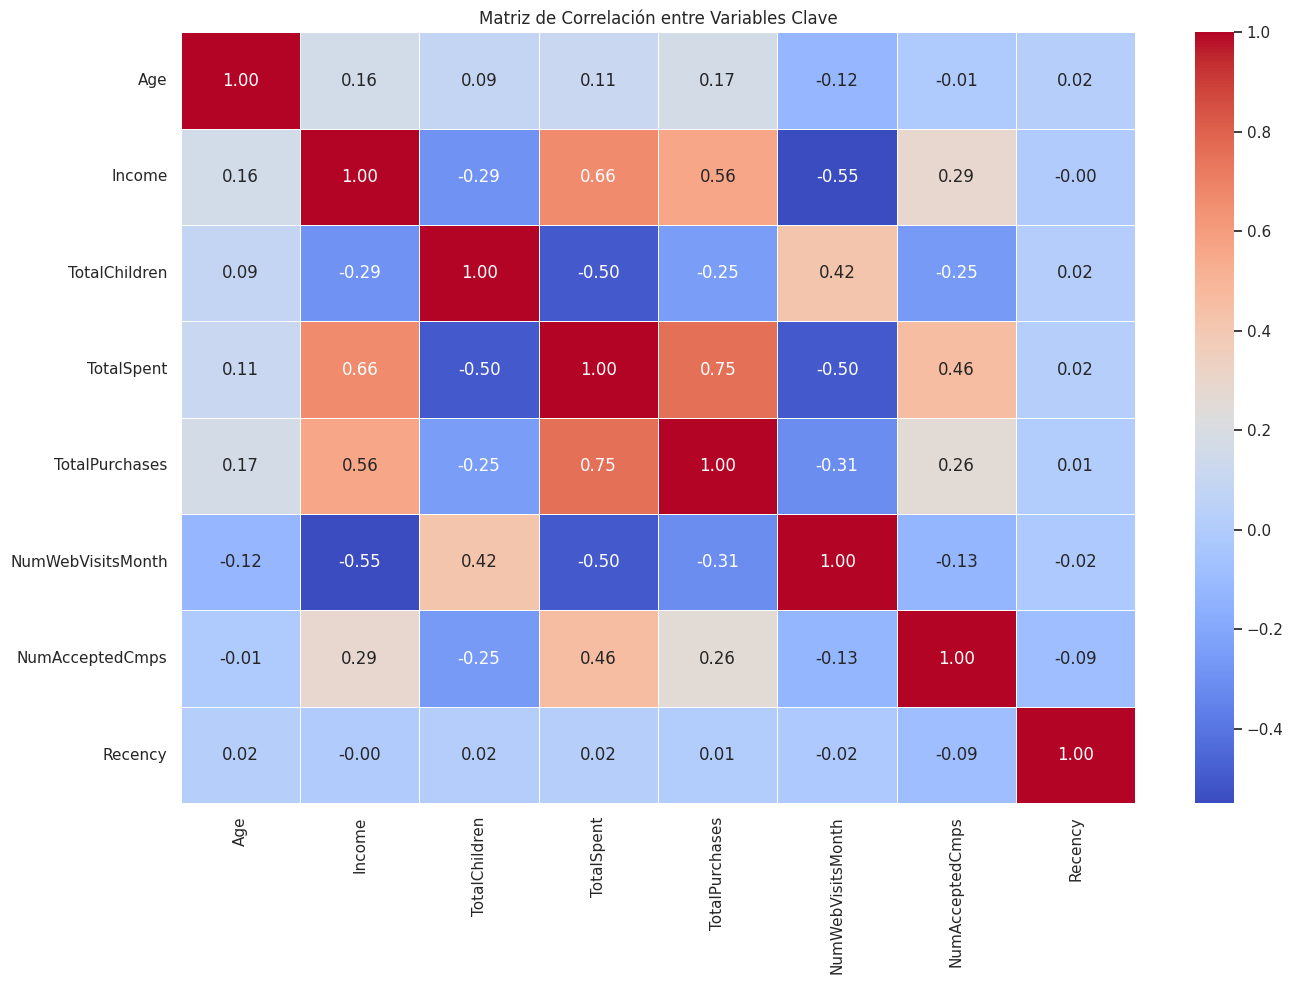

In [ ]:
# Configuración para visualizaciones
plt.figure(figsize=(15, 12))

# Distribución de variables numéricas importantes
key_vars = ['Age', 'Income', 'TotalSpent', 'TotalChildren']
for i, var in enumerate(key_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    plt.axvline(df[var].median(), color='green', linestyle='-.', label=f'Mediana: {df[var].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.savefig('distribuciones_numericas.png')
plt.show()

# Boxplots para detectar outliers en variables numéricas
plt.figure(figsize=(15, 12))
for i, var in enumerate(['Age', 'Income', 'TotalSpent', 'TotalPurchases']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.grid(True)

plt.tight_layout()
plt.savefig('boxplots_outliers.png')
plt.show()

# Distribución del gasto en diferentes categorías de productos
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(15, 8))
df[spending_cols].boxplot()
plt.title('Comparación del gasto en diferentes categorías de productos')
plt.ylabel('Monto gastado')
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig('comparacion_gastos.png')
plt.show()

# Visualización de la matriz de correlación
plt.figure(figsize=(14, 10))
correlation_vars = ['Age', 'Income', 'TotalChildren', 'TotalSpent', 'TotalPurchases',
                   'NumWebVisitsMonth', 'NumAcceptedCmps', 'Recency']
corr_matrix = df[correlation_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Clave')
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
plt.show()

### 3.2 Análisis por estado civil y educación

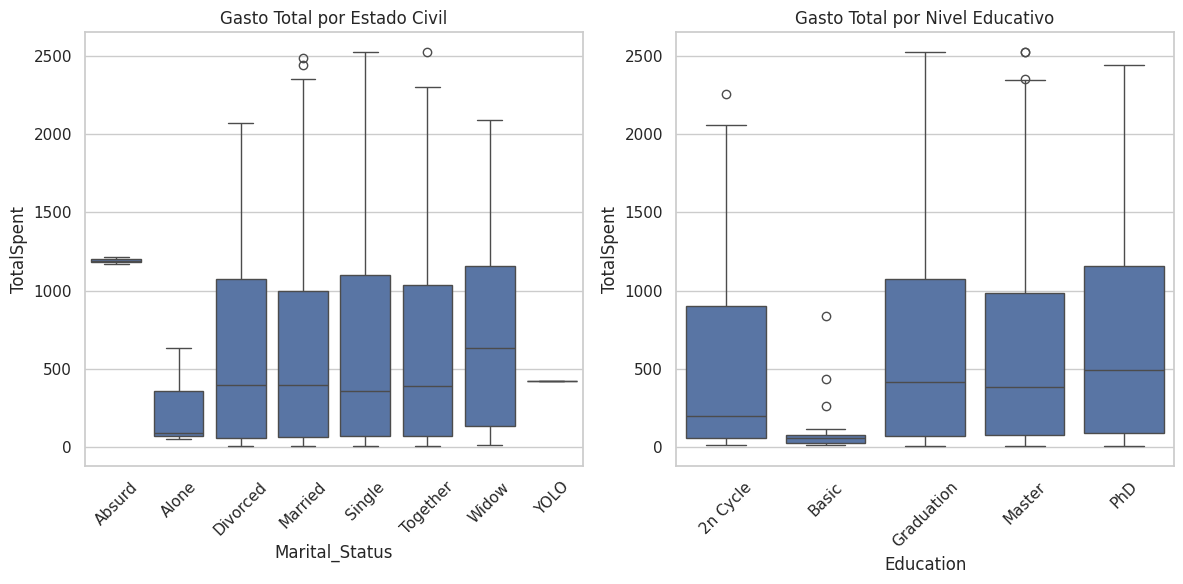

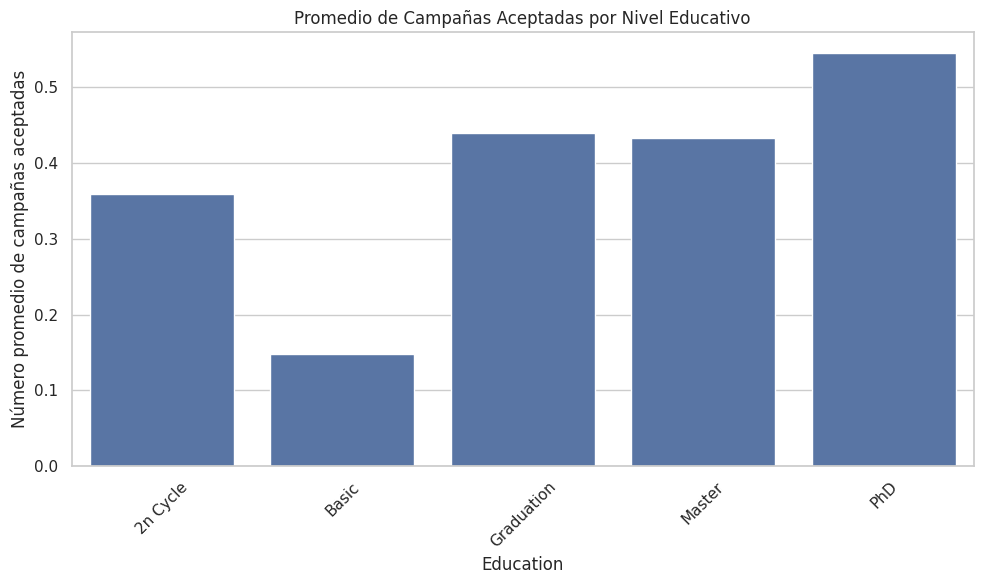

In [ ]:
# Relación entre variables categóricas y gasto total
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Marital_Status', y='TotalSpent', data=df)
plt.title('Gasto Total por Estado Civil')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Education', y='TotalSpent', data=df)
plt.title('Gasto Total por Nivel Educativo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('gasto_por_categoria.png')
plt.show()

# Analizar respuesta a campañas por nivel educativo
plt.figure(figsize=(10, 6))
campaign_response = df.groupby('Education')['NumAcceptedCmps'].mean().sort_values(ascending=False)
sns.barplot(x=campaign_response.index, y=campaign_response.values)
plt.title('Promedio de Campañas Aceptadas por Nivel Educativo')
plt.ylabel('Número promedio de campañas aceptadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('campanas_por_educacion.png')
plt.show()

### 3.3 Segmentación por nivel de gasto

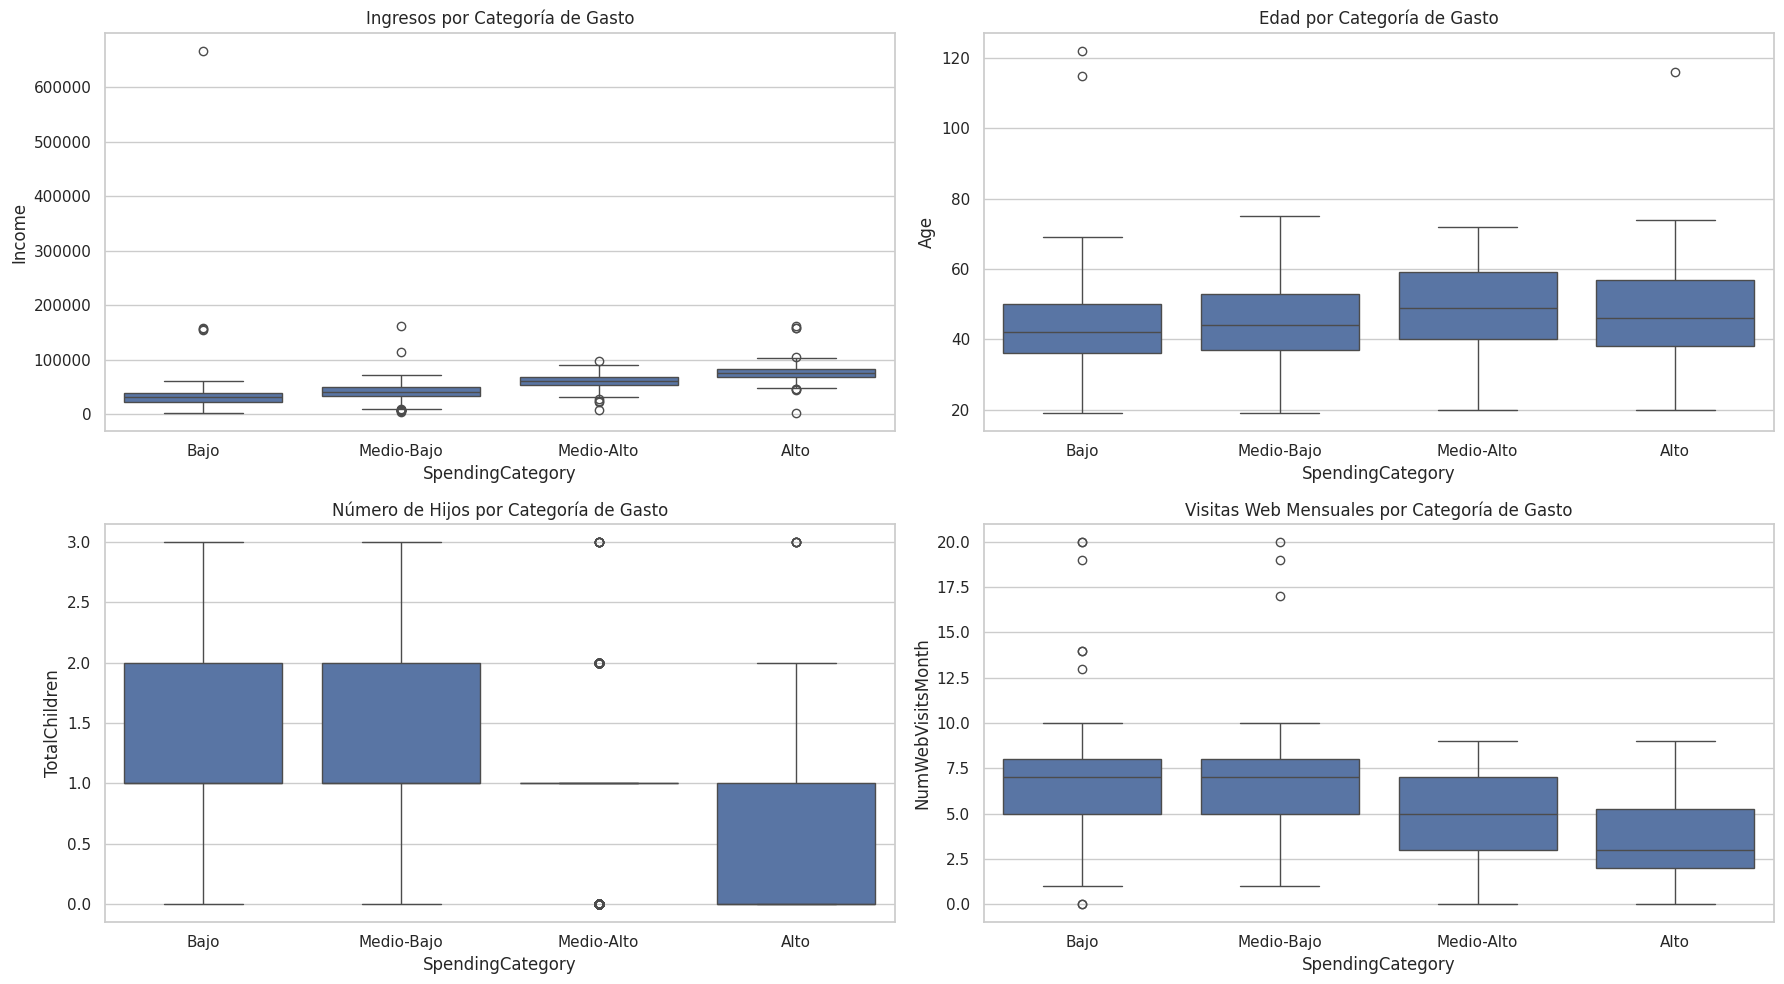

<Figure size 1200x600 with 0 Axes>

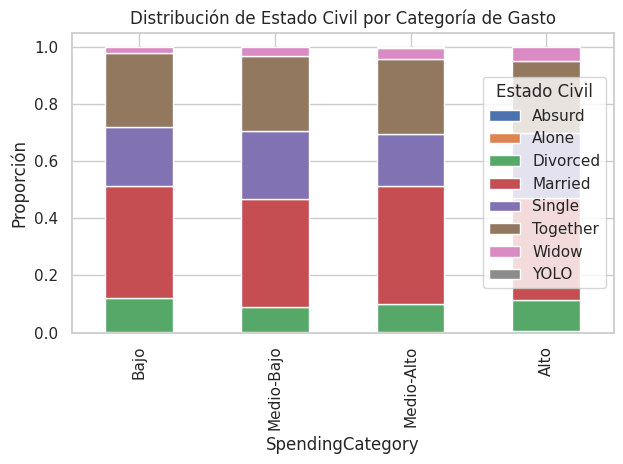

In [ ]:
# Segmentación de clientes por nivel de gasto
# Crear categorías de gasto utilizando cuartiles
df['SpendingCategory'] = pd.qcut(df['TotalSpent'],
                               q=4,
                               labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Visualizar características por categoría de gasto
plt.figure(figsize=(18, 10))

# Ingresos por categoría de gasto
plt.subplot(2, 2, 1)
sns.boxplot(x='SpendingCategory', y='Income', data=df)
plt.title('Ingresos por Categoría de Gasto')

# Edad por categoría de gasto
plt.subplot(2, 2, 2)
sns.boxplot(x='SpendingCategory', y='Age', data=df)
plt.title('Edad por Categoría de Gasto')

# Número de hijos por categoría de gasto
plt.subplot(2, 2, 3)
sns.boxplot(x='SpendingCategory', y='TotalChildren', data=df)
plt.title('Número de Hijos por Categoría de Gasto')

# Visitas web por categoría de gasto
plt.subplot(2, 2, 4)
sns.boxplot(x='SpendingCategory', y='NumWebVisitsMonth', data=df)
plt.title('Visitas Web Mensuales por Categoría de Gasto')

plt.tight_layout()
plt.savefig('segmentacion_por_gasto.png')
plt.show()

# Distribución de estado civil por categoría de gasto
plt.figure(figsize=(12, 6))
crosstab = pd.crosstab(df['SpendingCategory'], df['Marital_Status'], normalize='index')
crosstab.plot(kind='bar', stacked=True)
plt.title('Distribución de Estado Civil por Categoría de Gasto')
plt.ylabel('Proporción')
plt.legend(title='Estado Civil')
plt.tight_layout()
plt.savefig('estado_civil_por_gasto.png')
plt.show()

### 3.4 Análisis de valores atípicos (outliers)


--- Análisis de Valores Atípicos (Outliers) ---

Variable: Age
  Límite inferior: 11.00
  Límite superior: 83.00
  Número de outliers: 3 (0.13% del total)
  Valores extremos:
239    122
339    116
192    115
Name: Age, dtype: int64

Variable: Income
  Límite inferior: -13587.75
  Límite superior: 117416.25
  Número de outliers: 8 (0.36% del total)
  Valores extremos:
2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64

Variable: TotalSpent
  Límite inferior: -1396.38
  Límite superior: 2510.62
  Número de outliers: 3 (0.13% del total)
  Valores extremos:
1179    2525
1572    2525
1492    2524
Name: TotalSpent, dtype: int64

Variable: MntWines
  Límite inferior: -697.00
  Límite superior: 1225.00
  Número de outliers: 35 (1.56% del total)

Variable: MntMeatProducts
  Límite inferior: -308.00
  Límite superior: 556.00
  Número de outliers: 175 (7.81% del total)


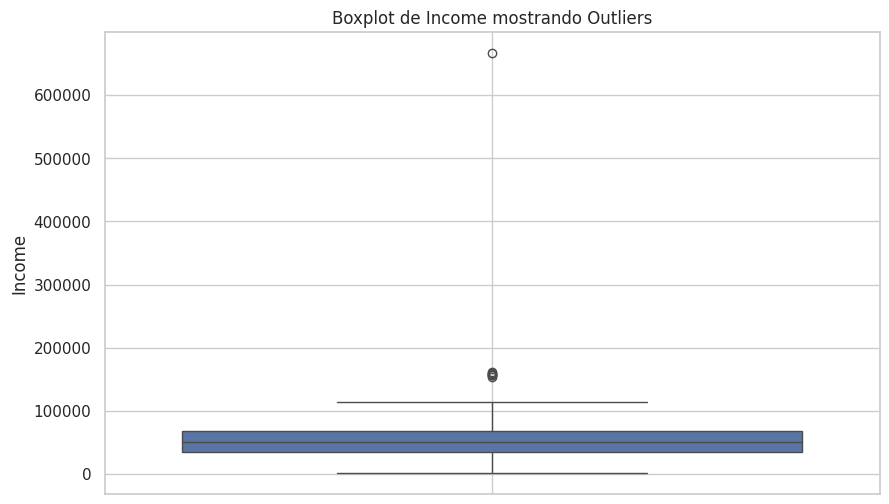

In [ ]:
# Identificación de outliers usando el método de rango intercuartílico (IQR)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

# Análisis de outliers para variables clave
print("\n--- Análisis de Valores Atípicos (Outliers) ---")
outlier_vars = ['Age', 'Income', 'TotalSpent', 'MntWines', 'MntMeatProducts']

for var in outlier_vars:
    outliers, lower, upper, count = identify_outliers(df, var)
    print(f"\nVariable: {var}")
    print(f"  Límite inferior: {lower:.2f}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Número de outliers: {count} ({(count/len(df)*100):.2f}% del total)")

    if count > 0 and count <= 10:  # Si hay pocos outliers, mostrarlos
        print("  Valores extremos:")
        print(outliers[var].sort_values(ascending=False).head())

# Visualización específica para outliers en Income
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Income'])
plt.title('Boxplot de Income mostrando Outliers')
plt.grid(True)
plt.savefig('outliers_income.png')
plt.show()

## 4. Análisis de correlación y relaciones entre variables

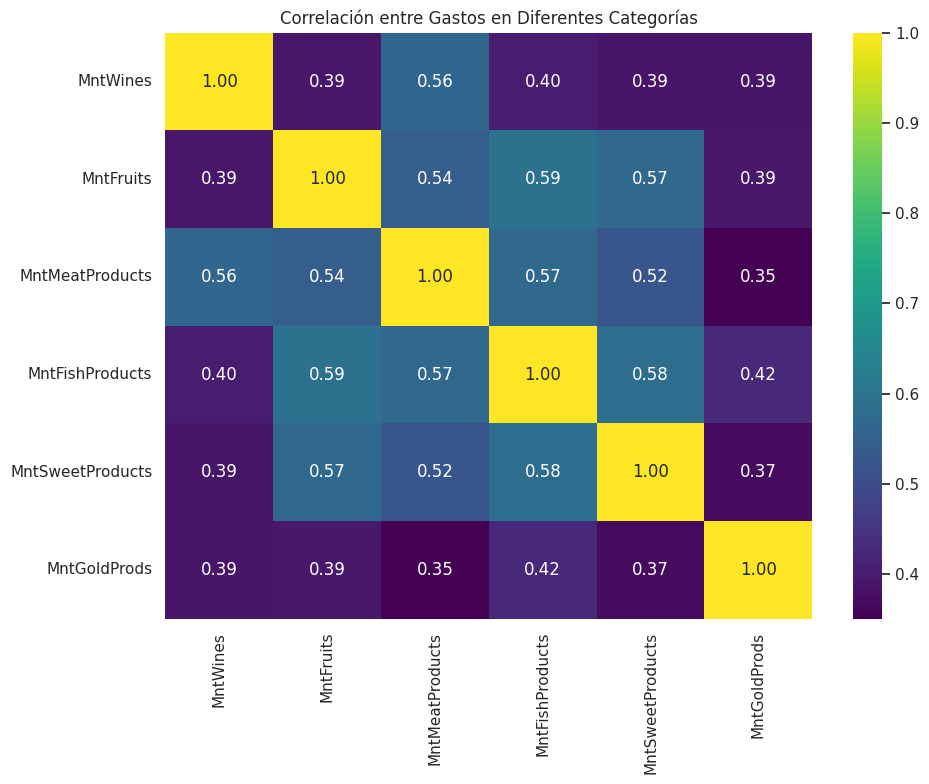

<Figure size 1200x1000 with 0 Axes>

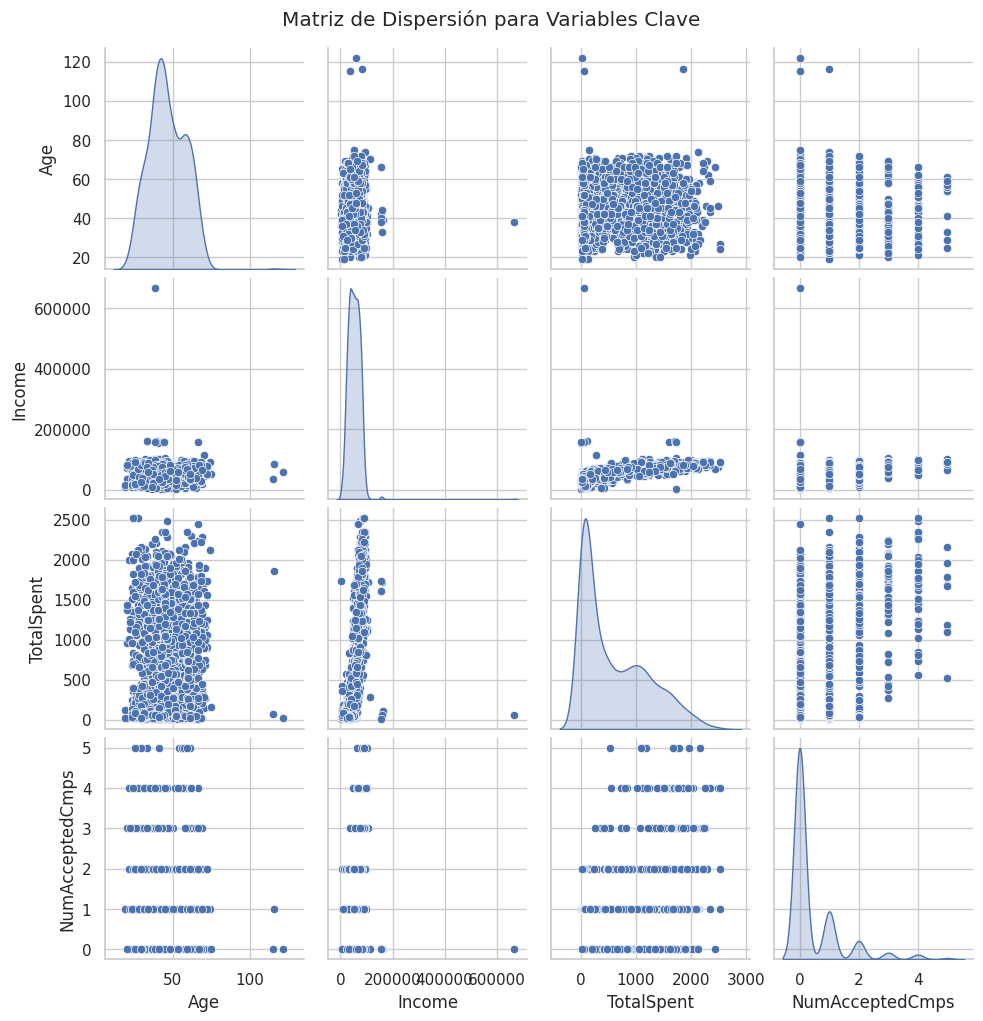

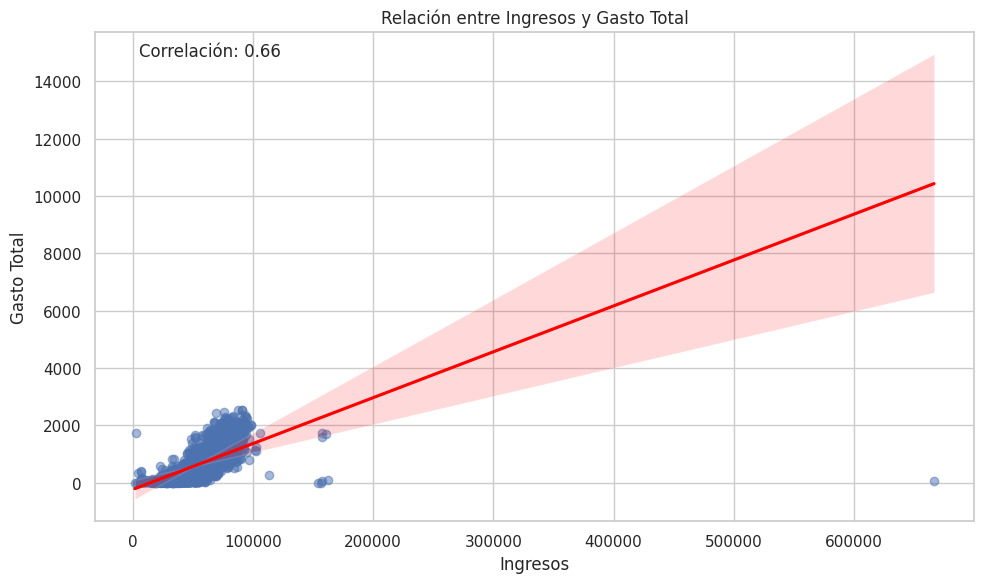

In [ ]:
# Correlación entre gastos en diferentes categorías de productos
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(10, 8))
sns.heatmap(df[spending_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlación entre Gastos en Diferentes Categorías')
plt.tight_layout()
plt.savefig('correlacion_gastos.png')
plt.show()

# Matriz de dispersión para variables clave
plt.figure(figsize=(12, 10))
scatter_vars = ['Age', 'Income', 'TotalSpent', 'NumAcceptedCmps']
sns.pairplot(df[scatter_vars], diag_kind='kde')
plt.suptitle('Matriz de Dispersión para Variables Clave', y=1.02)
plt.savefig('matriz_dispersion.png')
plt.show()

# Análisis de relación entre ingresos y gasto total
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='TotalSpent', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre Ingresos y Gasto Total')
plt.xlabel('Ingresos')
plt.ylabel('Gasto Total')
# Calcular y mostrar coeficiente de correlación
corr = df['Income'].corr(df['TotalSpent'])
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.tight_layout()
plt.savefig('relacion_ingresos_gasto.png')
plt.show()

## 5. Análisis de respuesta a campañas

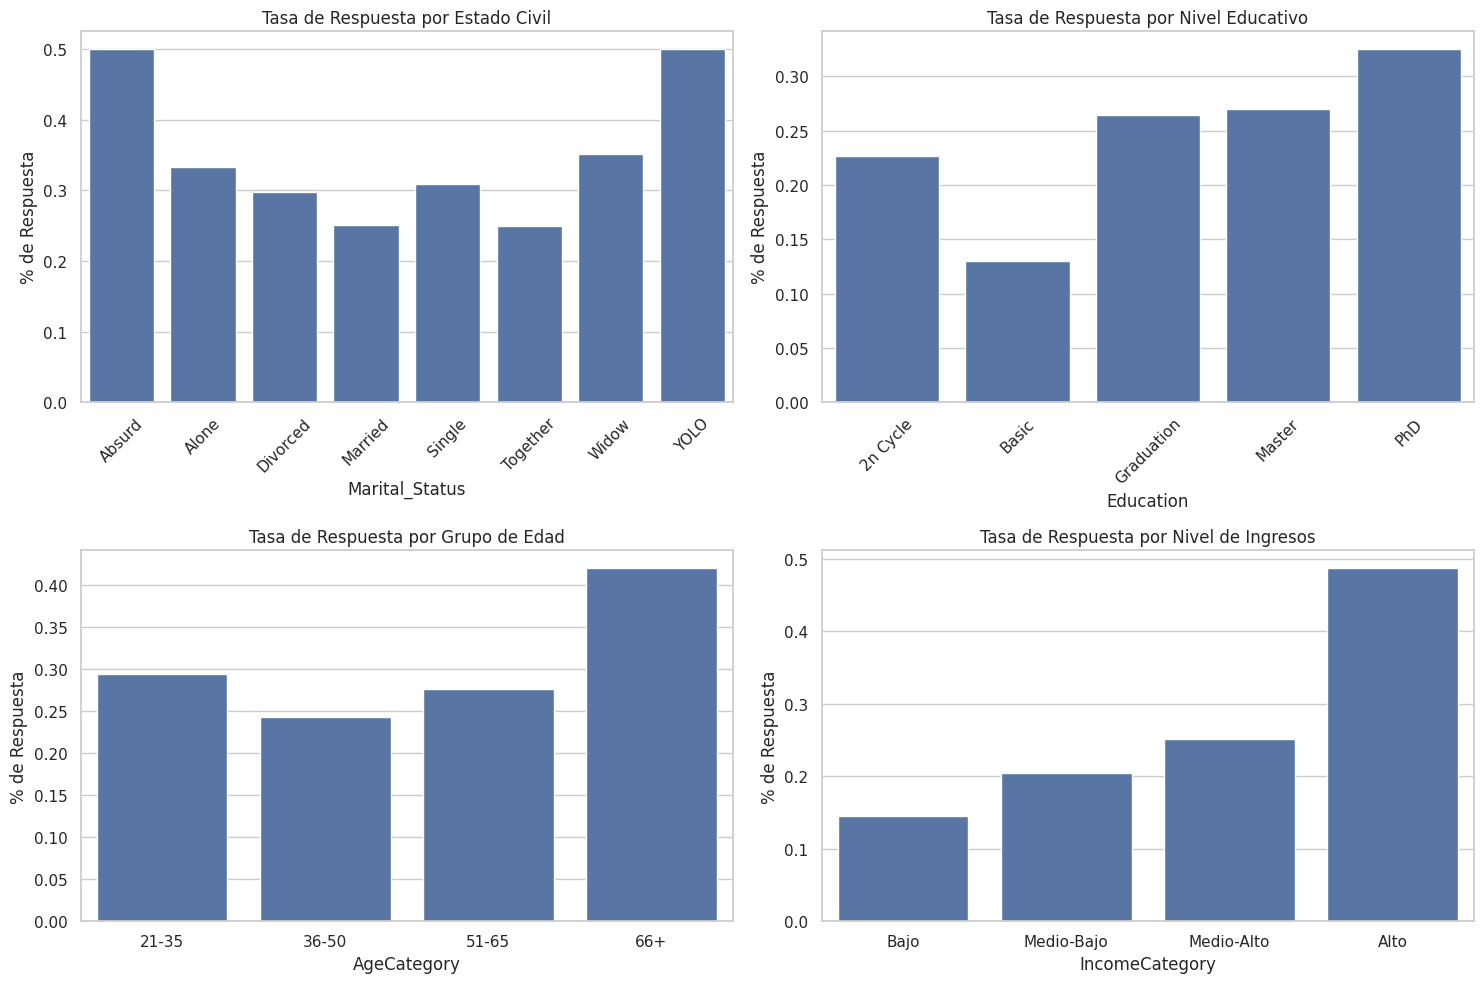

In [ ]:
# Análisis de factores que influyen en la respuesta a campañas
# Crear variable de respuesta general (si respondió a al menos una campaña)
df['ResponderToCampaign'] = df['NumAcceptedCmps'].apply(lambda x: 1 if x > 0 else 0)

# Tasa de respuesta por características demográficas
plt.figure(figsize=(15, 10))

# Por estado civil
plt.subplot(2, 2, 1)
response_by_marital = df.groupby('Marital_Status')['ResponderToCampaign'].mean().sort_values(ascending=False)
sns.barplot(x=response_by_marital.index, y=response_by_marital.values)
plt.title('Tasa de Respuesta por Estado Civil')
plt.ylabel('% de Respuesta')
plt.xticks(rotation=45)

# Por educación
plt.subplot(2, 2, 2)
response_by_edu = df.groupby('Education')['ResponderToCampaign'].mean().sort_values(ascending=False)
sns.barplot(x=response_by_edu.index, y=response_by_edu.values)
plt.title('Tasa de Respuesta por Nivel Educativo')
plt.ylabel('% de Respuesta')
plt.xticks(rotation=45)

# Por categoría de edad
df['AgeCategory'] = pd.cut(df['Age'], bins=[20, 35, 50, 65, 100],
                         labels=['21-35', '36-50', '51-65', '66+'])
plt.subplot(2, 2, 3)
response_by_age = df.groupby('AgeCategory')['ResponderToCampaign'].mean()
sns.barplot(x=response_by_age.index, y=response_by_age.values)
plt.title('Tasa de Respuesta por Grupo de Edad')
plt.ylabel('% de Respuesta')

# Por nivel de ingresos
df['IncomeCategory'] = pd.qcut(df['Income'], q=4,
                             labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
plt.subplot(2, 2, 4)
response_by_income = df.groupby('IncomeCategory')['ResponderToCampaign'].mean()
sns.barplot(x=response_by_income.index, y=response_by_income.values)
plt.title('Tasa de Respuesta por Nivel de Ingresos')
plt.ylabel('% de Respuesta')

plt.tight_layout()
plt.savefig('analisis_respuesta_campanas.png')
plt.show()

## 6. Conclusiones y hallazgos principales

In [ ]:
# Aquí presentamos un resumen de los hallazgos principales del análisis exploratorio

print("\n=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===\n")

# 1. Perfil demográfico de los clientes
print("1. PERFIL DEMOGRÁFICO DE LOS CLIENTES:")
print(f"   - Edad promedio: {df['Age'].mean():.1f} años (min: {df['Age'].min()}, max: {df['Age'].max()})")
print(f"   - Ingresos promedio: ${df['Income'].mean():.2f}")
print(f"   - Estado civil más común: {df['Marital_Status'].value_counts().index[0]} ({df['Marital_Status'].value_counts(normalize=True)[0]*100:.1f}%)")
print(f"   - Nivel educativo más común: {df['Education'].value_counts().index[0]} ({df['Education'].value_counts(normalize=True)[0]*100:.1f}%)")
print(f"   - Promedio de hijos por hogar: {df['TotalChildren'].mean():.2f}")

# 2. Patrones de gasto
print("\n2. PATRONES DE GASTO:")
print(f"   - Gasto promedio total por cliente: ${df['TotalSpent'].mean():.2f}")
print("   - Distribución del gasto por categoría:")
spending_avg = df[spending_cols].mean().sort_values(ascending=False)
for product, amount in spending_avg.items():
    print(f"     * {product}: ${amount:.2f} ({amount/df['TotalSpent'].mean()*100:.1f}% del gasto total)")
print(f"   - Correlación Ingresos-Gasto Total: {df['Income'].corr(df['TotalSpent']):.2f} (correlación positiva considerable)")

# 3. Comportamiento de compra
print("\n3. COMPORTAMIENTO DE COMPRA:")
print(f"   - Promedio de compras totales: {df['TotalPurchases'].mean():.2f}")
print(f"   - Promedio de visitas web mensuales: {df['NumWebVisitsMonth'].mean():.2f}")
print("   - Distribución por canal:")
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
purchase_avg = df[purchase_channels].mean().sort_values(ascending=False)
for channel, amount in purchase_avg.items():
    print(f"     * {channel}: {amount:.2f} ({amount/df['TotalPurchases'].mean()*100:.1f}% de las compras)")

# 4. Respuesta a campañas
print("\n4. RESPUESTA A CAMPAÑAS:")
print(f"   - Tasa general de respuesta a al menos una campaña: {df['ResponderToCampaign'].mean()*100:.2f}%")
print("   - Factores asociados con mayor respuesta:")
print(f"     * Nivel educativo: {response_by_edu.index[0]} tiene la mayor tasa ({response_by_edu.values[0]*100:.1f}%)")
print(f"     * Estado civil: {response_by_marital.index[0]} tiene la mayor tasa ({response_by_marital.values[0]*100:.1f}%)")
print(f"     * Nivel de ingresos: {response_by_income.index[-1]} tiene la mayor tasa ({response_by_income.values[-1]*100:.1f}%)")

# 5. Valores atípicos y distribución
print("\n5. VALORES ATÍPICOS Y DISTRIBUCIÓN:")
print("   - Se identificaron outliers significativos en las siguientes variables:")
for var in outlier_vars:
    _, _, _, count = identify_outliers(df, var)
    print(f"     * {var}: {count} outliers ({count/len(df)*100:.1f}% de los registros)")
print("   - Distribución de variables clave:")
for var in ['Age', 'Income', 'TotalSpent']:
    skew = df[var].skew()
    desc = "simétrica" if abs(skew) < 0.5 else "sesgada a la derecha" if skew > 0 else "sesgada a la izquierda"
    print(f"     * {var}: Distribución {desc} (skew = {skew:.2f})")
    print(f"       Media: {df[var].mean():.2f}, Mediana: {df[var].median():.2f}, Moda: {get_mode(df[var]):.2f}")

# 6. Segmentos identificados
print("\n6. SEGMENTOS DE CLIENTES IDENTIFICADOS:")
print("   - Por nivel de gasto:")
for segment in ['Alto', 'Medio-Alto', 'Medio-Bajo', 'Bajo']:
    segment_data = df[df['SpendingCategory'] == segment]
    print(f"     * {segment} ({len(segment_data)/len(df)*100:.1f}% de clientes):")
    print(f"       Ingresos promedio: ${segment_data['Income'].mean():.2f}")
    print(f"       Edad promedio: {segment_data['Age'].mean():.1f} años")
    print(f"       Hijos promedio: {segment_data['TotalChildren'].mean():.2f}")
    print(f"       Tasa de respuesta a campañas: {segment_data['ResponderToCampaign'].mean()*100:.1f}%")

# 7. Recomendaciones para campañas futuras
print("\n7. RECOMENDACIONES PARA CAMPAÑAS FUTURAS:")
print("   - Enfocarse en segmentos con mayor tasa de respuesta:")
print("     * Clientes con educación superior")
print("     * Clientes con ingresos altos")
print("   - Personalizar ofertas por categoría de productos según segmentos")
print("   - Considerar el canal de compra preferido de cada segmento")


=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===

1. PERFIL DEMOGRÁFICO DE LOS CLIENTES:
   - Edad promedio: 46.2 años (min: 19, max: 122)
   - Ingresos promedio: $52237.98
   - Estado civil más común: Married (38.6%)
   - Nivel educativo más común: Graduation (50.3%)
   - Promedio de hijos por hogar: 0.95

2. PATRONES DE GASTO:
   - Gasto promedio total por cliente: $605.80
   - Distribución del gasto por categoría:
     * MntWines: $303.94 (50.2% del gasto total)
     * MntMeatProducts: $166.95 (27.6% del gasto total)
     * MntGoldProds: $44.02 (7.3% del gasto total)
     * MntFishProducts: $37.53 (6.2% del gasto total)
     * MntSweetProducts: $27.06 (4.5% del gasto total)
     * MntFruits: $26.30 (4.3% del gasto total)
   - Correlación Ingresos-Gasto Total: 0.66 (correlación positiva considerable)

3. COMPORTAMIENTO DE COMPRA:
   - Promedio de compras totales: 14.86
   - Promedio de visitas web mensuales: 5.32
   - Distribución por canal:
     * NumStorePurchases: 5.79 (39.0% de las 

## Resumen metodológico

Este análisis exploratorio de datos siguió una metodología estructurada:

1. **Exploración inicial y limpieza**: Identificación de tipos de variables, manejo de valores nulos y creación de variables derivadas útiles.

2. **Análisis estadístico descriptivo**: Cálculo de medidas de tendencia central (media, mediana, moda), dispersión (desviación estándar, IQR), distribución (asimetría, curtosis) y tablas de frecuencia.

3. **Visualización de datos**: Histogramas, boxplots, gráficos de barras y matrices de correlación para identificar patrones y relaciones.

4. **Análisis de valores atípicos**: Identificación de outliers mediante el método IQ